In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv (r'titanic_dataset.csv',index_col='PassengerId')
# df = pd.DataFrame(df, columns= ['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [54]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [55]:
df=df.drop(['Cabin'], axis = 1)
df['Age']=df['Age'].fillna(np.random.randint(80))
df = df[df['Embarked'].notna()]

In [56]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [57]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
dfencod=df.drop(['Name'], axis = 1)
dfencod=dfencod.drop(['Ticket'], axis = 1)
dfencod=pd.get_dummies(dfencod,prefix="Embarked",columns=["Embarked"])
dfencod=pd.get_dummies(dfencod,prefix="Pclass",columns=["Pclass"])
dfencod=pd.get_dummies(dfencod,prefix="SibSp",columns=["SibSp"])
dfencod=pd.get_dummies(dfencod,prefix="Parch",columns=["Parch"])
dfencod=pd.get_dummies(dfencod,prefix="Sex",columns=["Sex"])
Q = min_max.fit_transform(dfencod)
Q =pd.DataFrame(dfencod)

In [58]:
Q

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1,38.0,71.2833,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,26.0,7.9250,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,1,35.0,53.1000,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,35.0,8.0500,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,13.0000,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
888,1,19.0,30.0000,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
889,0,64.0,23.4500,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Q = scalar.fit_transform(Q)
Q = pd.DataFrame(Q, columns = dfencod.columns)
Q.describe()

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,...,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-6.144316e-17,1.068699e-16,1.092115e-16,4.402178e-17,-7.193346e-17,1.064016e-16,2.816145e-16,6.993531e-18,3.157080e-16,2.964758e-16,...,-1.152996e-16,2.018133e-16,2.381547e-16,-8.392237e-17,3.579814e-16,1.219185e-16,3.096511e-16,2.134900e-16,3.601668e-16,-3.601668e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,...,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-7.869611e-01,-1.910718e+00,-6.462044e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-5.630604e-01,-5.108746e-01,-1.110706e+00,-1.463333e+00,...,-8.908708e-02,-1.781491e+00,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02,-7.353420e-01,-1.359911e+00
25%,-7.869611e-01,-7.673420e-01,-4.872378e-01,-4.827108e-01,-3.079409e-01,-1.621287e+00,-5.630604e-01,-5.108746e-01,-1.110706e+00,-1.463333e+00,...,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02,-7.353420e-01,-1.359911e+00
50%,-7.869611e-01,-2.375105e-01,-3.551972e-01,-4.827108e-01,-3.079409e-01,6.167940e-01,-5.630604e-01,-5.108746e-01,9.003281e-01,6.833716e-01,...,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02,-7.353420e-01,7.353420e-01
75%,1.270711e+00,9.281188e-01,-2.207954e-02,-4.827108e-01,-3.079409e-01,6.167940e-01,-5.630604e-01,-5.108746e-01,9.003281e-01,6.833716e-01,...,-8.908708e-02,5.613277e-01,-3.912135e-01,-3.144639e-01,-7.520710e-02,-6.722926e-02,-7.520710e-02,-3.355780e-02,1.359911e+00,7.353420e-01
max,1.270711e+00,2.305681e+00,9.668551e+00,2.071634e+00,3.247377e+00,6.167940e-01,1.776008e+00,1.957427e+00,9.003281e-01,6.833716e-01,...,1.122497e+01,5.613277e-01,2.556149e+00,3.180016e+00,1.329662e+01,1.487447e+01,1.329662e+01,2.979933e+01,1.359911e+00,7.353420e-01


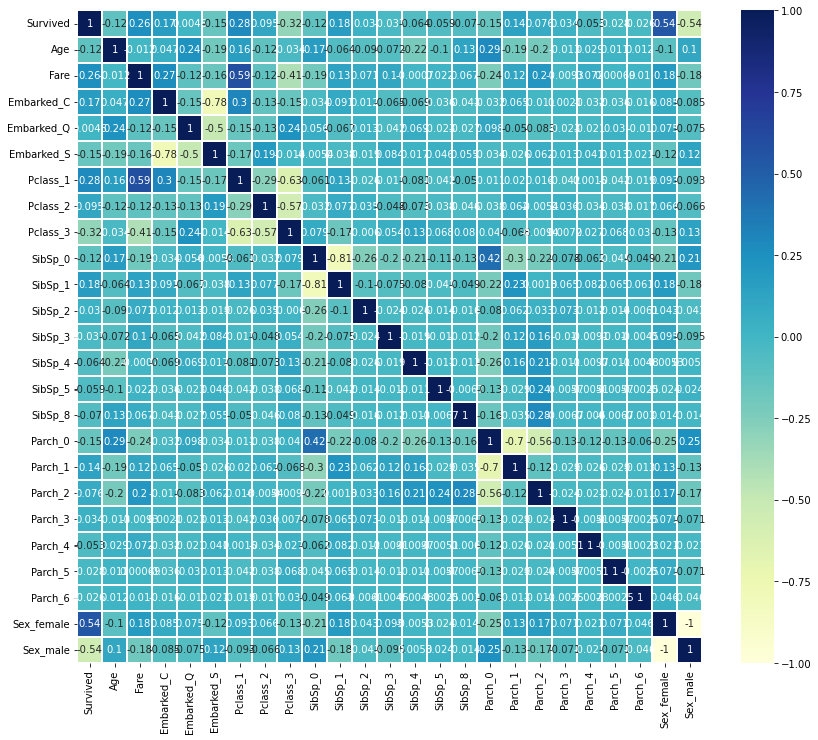

In [60]:
plt.figure(figsize=(14,12))
sns.heatmap(Q.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [61]:
from sklearn.model_selection import train_test_split
X=Q.drop(['Survived'], axis=1)
Y=df['Survived']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score

DesTr = DecisionTreeClassifier(random_state=42)
GausNB = GaussianNB()
logireg = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)
SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

logireg.fit(X_train, Y_train)
logireg_y_pred_train=logireg.predict(X_train)
logireg_y_pred_test=logireg.predict(X_test)
logireg_train_score = f1_score(Y_train.values, logireg_y_pred_train)
logireg_test_score = f1_score(Y_test.values, logireg_y_pred_test)
print("LogisticRegression Accuracy:",metrics.accuracy_score(Y_test,logireg_y_pred_test))
print("LogisticRegression: F1 score{train:",logireg_train_score, ", test:",logireg_test_score,"}")

DesTr.fit(X_train, Y_train)
DesTr_y_pred_train = DesTr.predict(X_train)
DesTr_y_pred_test = DesTr.predict(X_test)
DesTr_train_score = f1_score(Y_train.values, DesTr_y_pred_train)
DesTr_test_score = f1_score(Y_test.values, DesTr_y_pred_test)
print("DecisionTree Accuracy:",metrics.accuracy_score(Y_test, DesTr_y_pred_test))
print("DecisionTreeClassifier: F1 score{train:",DesTr_train_score, ", test:",DesTr_test_score,"}")

GausNB.fit(X_train, Y_train)
GausNB_y_pred_train = GausNB.predict(X_train)
GausNB_y_pred_test = GausNB.predict(X_test)
GausNB_train_score = f1_score(Y_train.values, GausNB_y_pred_train)
GausNB_test_score = f1_score(Y_test.values, GausNB_y_pred_test)
print("GaussianNB Accuracy:",metrics.accuracy_score(Y_test, GausNB_y_pred_test))
print("GaussianNB: F1 score{train:",GausNB_train_score, ", test:",GausNB_test_score,"}")

RFC.fit(X_train, Y_train)
RFC_y_pred_train=RFC.predict(X_train)
RFC_y_pred_test=RFC.predict(X_test)
RFC_train_score = f1_score(Y_train.values, RFC_y_pred_train)
RFC_test_score = f1_score(Y_test.values, RFC_y_pred_test)
print("RandomForest Accuracy:",metrics.accuracy_score(Y_test,RFC_y_pred_test))
print("RandomForest: F1 score{train:",RFC_train_score, ", test:",RFC_test_score,"}")


KNN.fit(X_train, Y_train)
KNN_y_pred_train = KNN.predict(X_train)
KNN_y_pred_test=KNN.predict(X_test)
KNN_train_score = f1_score(Y_train.values, KNN_y_pred_train)
KNN_test_score = f1_score(Y_test.values,KNN_y_pred_test)
print("KNeighbors Accuracy:",metrics.accuracy_score(Y_test,KNN_y_pred_test))
print("KNeighbors: F1 score{train:",KNN_train_score, ", test:",KNN_test_score,"}")

SVM.fit(X_train, Y_train)
SVM_y_pred_train = SVM.predict(X_train)
SVM_y_pred_test=SVM.predict(X_test)
SVM_train_score = f1_score(Y_train.values, SVM_y_pred_train)
SVM_test_score = f1_score(Y_test.values,SVM_y_pred_test)
print("SVM Accuracy:",metrics.accuracy_score(Y_test,SVM_y_pred_test))
print("SVM: F1 score{train:",SVM_train_score, ", test:",SVM_test_score,"}")

SGD.fit(X_train, Y_train)
SGD_y_pred_train = SGD.predict(X_train)
SGD_y_pred_test=SGD.predict(X_test)
SGD_train_score = f1_score(Y_train.values, SGD_y_pred_train)
SGD_test_score = f1_score(Y_test.values, SGD_y_pred_test)
print("SGD Accuracy:",metrics.accuracy_score(Y_test,SGD_y_pred_test))
print("SGD: F1 score{train:",SGD_train_score, ", test:",SGD_test_score,"}")


LogisticRegression Accuracy: 0.8202247191011236
LogisticRegression: F1 score{train: 0.7282229965156793 , test: 0.7575757575757577 }
DecisionTree Accuracy: 0.7865168539325843
DecisionTreeClassifier: F1 score{train: 0.9782971619365609 , test: 0.7164179104477612 }
GaussianNB Accuracy: 0.4044943820224719
GaussianNB: F1 score{train: 0.5647279549718575 , test: 0.5691056910569106 }
RandomForest Accuracy: 0.797752808988764
RandomForest: F1 score{train: 0.9785831960461284 , test: 0.7096774193548387 }
KNeighbors Accuracy: 0.797752808988764
KNeighbors: F1 score{train: 0.7292035398230088 , test: 0.7096774193548387 }
SVM Accuracy: 0.8314606741573034
SVM: F1 score{train: 0.7721739130434783 , test: 0.7761194029850746 }
SGD Accuracy: 0.7303370786516854
SGD: F1 score{train: 0.6352087114337568 , test: 0.6470588235294118 }


In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(Q)
x_pca = pca.transform(Q)
x_pca.shape

(889, 2)

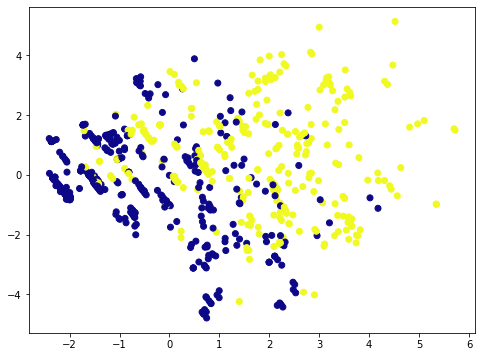

In [64]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = Q['Survived'], cmap ='plasma')
